# Tutorial 1: Getting Started with SQuADDS

In this tutorial, we will walk you through some basic usage of SQuADDS. By the end of this tutorial, you will be able to:

- Have an HuggingFace account

- Access the SQuADDS Database

- Use the SQuADDS API to query for closest and "best-guess" interpolated device designs for your chosen Hamiltonian parameters

- Simulate the "best-guess" design using an EM solver tool

In [1]:
%load_ext autoreload
%autoreload 2

Since the SQuADDS Database is hosted on [HuggingFace](https://huggingface.co/), we will need to create an account and get an API key to access the database.

## HuggingFace ü§ó 

HuggingFace is a company that provides a large number of NLP models and datasets. They also provide a platform to host your own models and datasets.

### Creating an  Account

Follow the instructions here - [HuggingFace: Sign Up](https://huggingface.co/join) - to create an account.

Once you have created an account, you can get your API key from the [settings page](https://huggingface.co/settings/token).

Please update the `HUGGINGFACE_API_KEY` variable in the `.env` file with your API key **OR** execute the following code to set the environment variable.

In [1]:
from squadds.core.utils import set_huggingface_api_key

set_huggingface_api_key()

DotNet Core correctly loaded.
API key added to .env file.


### Login

To login to your HuggingFace account, run the following command in your terminal:

```bash
huggingface-cli login
```



You will be prompted to enter your username and password. Once you have logged in, you can check your login status by running the following command:

```bash
huggingface-cli whoami
```

### Accessing the SQuADDS Database using the HuggingFace API

The SQuADDS Database is hosted on HuggingFace. You can access the database using the `datasets` library from HuggingFace.

In [3]:
from datasets import get_dataset_config_names
from datasets import load_dataset

configs = get_dataset_config_names("SQuADDS/SQuADDS_DB")

You can navigate the database using HuggingFace API. For example, you can access the qubit database using the following code:

In [4]:
qubit_data = load_dataset("SQuADDS/SQuADDS_DB", configs[0])

In [5]:
qubit_data

DatasetDict({
    train: Dataset({
        features: ['contributor', 'sim_options', 'sim_results', 'design', 'notes'],
        num_rows: 1934
    })
})

Each configuration in the dataset is uniquely identified by their `config`. For the SQuADDS Database, the `config` string is created in the following format:

```python
config = f"{component}_{component_name}_{data_type}"
```

where `component` is the name of the component, `component_name` is the name of the component (in Qiskit Metal), and `data_type` is the type of simulation data that has been contributed.

Lets check what the `config` string looks like for our database:

In [4]:
components = []
component_names = []
data_types = []

for config in configs:
    components.append(config.split("-")[0])
    component_names.append(config.split("-")[1])
    data_types.append(config.split("-")[2])
    
print(components)
print(component_names)
print(data_types)
    

['qubit', 'cavity_claw', 'coupler']
['TransmonCross', 'RouteMeander', 'NCap']
['cap_matrix', 'eigenmode', 'cap_matrix']


## Using the SQuADDS API to access and anlyze the database

While it is possible to directly access the SQuADDS Database using the `datasets` library, we have created a simple API to make it easier to query the database.

The main object we use to access the database is the `SQuADDS_DB` class. 

In [2]:
from squadds import SQuADDS_DB

db = SQuADDS_DB()

DotNet Core correctly loaded.


You can get a summary of the datasets by running.

In [3]:
db.view_datasets()

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Component   ‚îÇ Component Name   ‚îÇ Data Available   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ qubit       ‚îÇ TransmonCross    ‚îÇ cap_matrix       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ cavity_claw ‚îÇ RouteMeander     ‚îÇ eigenmode        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ coupler     ‚îÇ NCap             ‚îÇ cap_matrix       ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚

To check for the `config` names

In [4]:
db.get_configs()

['qubit-TransmonCross-cap_matrix',
 'cavity_claw-RouteMeander-eigenmode',
 'coupler-NCap-cap_matrix']


If you are interested to learn more about each configuration, you can do so by using the `get_dataset_info` method.


In [5]:
db.get_dataset_info(component="qubit", component_name="TransmonCross", data_type="cap_matrix")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset Features:
{'contributor': {'PI': Value(dtype='string', id=None),
                 'date_created': Value(dtype='string', id=None),
                 'group': Value(dtype='string', id=None),
                 'institution': Value(dtype='string', id=None),
                 'uploader': Value(dtype='string', id=None)},
 'design': {'design_options': {...},
            'design_tool': Value(dtype='string', id=None)},
 'notes': {},
 'sim_options': {'renderer_options': {...},
                 'setup': {...},
                 'simulator': Value(dtype='string', id=None)},
 'sim_results': {'claw_to_claw': Value(dtype='float64', id=None),
                 'claw_to_ground': Value(dtype='float64', id=None),
                 'cross_to_claw': Value(dtype='float64', id=None),
                 'cross_to_cross': Value(dtype='float64', id=None),
                 'cross_to_ground': Value(dtype='float64', id=None),
                 'ground_to_ground': Value(dtype='float64', id=None),
                 'u

In [6]:
db.get_dataset_info(component="cavity_claw", component_name="RouteMeander", data_type="eigenmode")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset Features:
{'contributor': {'PI': Value(dtype='string', id=None),
                 'date_created': Value(dtype='string', id=None),
                 'group': Value(dtype='string', id=None),
                 'institution': Value(dtype='string', id=None),
                 'uploader': Value(dtype='string', id=None)},
 'design': {'coupler_type': Value(dtype='string', id=None),
            'design_options': {...},
            'design_tool': Value(dtype='string', id=None),
            'resonator_type': Value(dtype='string', id=None)},
 'notes': {},
 'sim_options': {'setup': {...}, 'simulator': Value(dtype='string', id=None)},
 'sim_results': {'cavity_frequency': Value(dtype='float64', id=None),
                 'kappa': Value(dtype='float64', id=None),
                 'units': Value(dtype='string', id=None)}}

Dataset Description:


Dataset Citation:


Dataset Homepage:


Dataset License:


Dataset Size in Bytes:
891279


You can get the entire dataset as a Pandas DataFrame by using the `get_dataset` method.

In [7]:
db.see_dataset(component="qubit", component_name="TransmonCross", data_type="cap_matrix")

claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
0         94.97421        90.86585        3.73363       158.40783   
1         82.44280        79.19378        2.93820       188.15089   
2         83.76412        80.18130        3.16131       104.35340   
3        103.37057        97.22405        5.77590       174.13928   
4         68.92854        65.68607        2.87375       120.03923   
...            ...             ...            ...             ...   
1929     106.43025       101.53197        4.45645       174.46380   
1930     121.10943       112.62570        7.95178       187.43537   
1931     144.56289       136.36810        7.65968       172.14561   
1932      68.76413        65.78116        2.48795        56.75230   
1933      58.45749        55.50796        2.54396        62.01000   

      cross_to_ground  ground_to_ground units                      PI  \
0           158.40783         311.25590    fF  Eli Levenson-Falk, PhD   
1           188.15089         333.52997    fF  Eli Levenson-Falk, PhD   
2           104.35340         237.02548    fF  Eli Levenson-Falk, PhD   
3           174.13928         335.31609    fF  Eli Levenson-Falk, PhD   
4           120.03923         240.34085    fF  Eli Levenson-Falk, PhD   
...               ...               ...   ...                     ...   
1929        174.46380         340.62919    fF  Eli Levenson-Falk, PhD   
1930        187.43537         367.34003    fF  Eli Levenson-Falk, PhD   
1931        172.14561         372.39970    fF  Eli Levenson-Falk, PhD   
1932         56.75230         166.57383    fF  Eli Levenson-Falk, PhD   
1933         62.01000         162.42140    fF  Eli Levenson-Falk, PhD   

           date_created group institution   uploader  \
0     2023-09-20-142547   LFL         USC  Andre Kuo   
1     2023-10-25-153123   LFL         USC  Andre Kuo   
2     2023-09-20-142547   LFL         USC  Andre Kuo   
3     2023-10-25-153126   LFL         USC  Andre Kuo   
4     2023-09-20-142547   LFL         USC  Andre Kuo   
...                 ...   ...         ...        ...   
1929  2023-09-20-142547   LFL         USC  Andre Kuo   
1930  2023-09-20-142549   LFL         USC  Andre Kuo   
1931  2023-10-25-153123   LFL         USC  Andre Kuo   
1932  2023-09-20-142547   LFL         USC  Andre Kuo   
1933  2023-09-20-142549   LFL         USC  Andre Kuo   

                                         design_options   design_tool  \
0     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
2     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
3     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
4     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
...                                                 ...           ...   
1929  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1930  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1931  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1932  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1933  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   

                                       renderer_options  \
0     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
2     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
3     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
4     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
...                                                 ...   
1929  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1930  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1931  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1932  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1933  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                         

If you want to learn about the who contributed the data, you can use the following methods:

In [8]:
db.view_contributors_of("qubit", "TransmonCross", "cap_matrix")

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ uploader   ‚îÇ PI                     ‚îÇ group   ‚îÇ institution   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Andre Kuo  ‚îÇ Eli Levenson-Falk, PhD ‚îÇ LFL     ‚îÇ USC           ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


In [9]:
db.view_all_contributors()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ uploader   ‚îÇ PI                     ‚îÇ group   ‚îÇ institution   ‚îÇ config                             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Andre Kuo  ‚îÇ Eli Levenson-Falk, PhD ‚îÇ LFL     ‚îÇ USC           ‚îÇ qubit-TransmonCross-cap_matrix     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ

As the SQuADDS_DB dataset updates, so will all the information we have queried automatically. 

## Making Systems out of Circuit QED Elements

One of the main use cases of the SQuADDS project is to get the design space parameters for systems of our interest using our desired Hamiltonian parameters.

Using the SQuADDS API, we can "build" a system by choosing the circuit QED components we want to use.

The following subsections walks you through some examples.

### Querying for the a target qubit design

Let's say you know the Hamiltonian parameters of a qubit you want to use. You can use the SQuADDS API to query for the closest design to your target qubit.

We first need to select our sytem of interest.

In [10]:
db.select_system("qubit")

Now, we need to specify to SQuADDS what type of `qubit` our system is. We can do this by using the `select_qubit` method.

In [11]:
db.select_qubit("TransmonCross")

We now create the system dataframe so that we can query for the design parameters we are interested in.

In [12]:
df = db.create_system_df()
df

claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
0         94.97421        90.86585        3.73363       158.40783   
1         82.44280        79.19378        2.93820       188.15089   
2         83.76412        80.18130        3.16131       104.35340   
3        103.37057        97.22405        5.77590       174.13928   
4         68.92854        65.68607        2.87375       120.03923   
...            ...             ...            ...             ...   
1929     106.43025       101.53197        4.45645       174.46380   
1930     121.10943       112.62570        7.95178       187.43537   
1931     144.56289       136.36810        7.65968       172.14561   
1932      68.76413        65.78116        2.48795        56.75230   
1933      58.45749        55.50796        2.54396        62.01000   

      cross_to_ground  ground_to_ground units                      PI  \
0           158.40783         311.25590    fF  Eli Levenson-Falk, PhD   
1           188.15089         333.52997    fF  Eli Levenson-Falk, PhD   
2           104.35340         237.02548    fF  Eli Levenson-Falk, PhD   
3           174.13928         335.31609    fF  Eli Levenson-Falk, PhD   
4           120.03923         240.34085    fF  Eli Levenson-Falk, PhD   
...               ...               ...   ...                     ...   
1929        174.46380         340.62919    fF  Eli Levenson-Falk, PhD   
1930        187.43537         367.34003    fF  Eli Levenson-Falk, PhD   
1931        172.14561         372.39970    fF  Eli Levenson-Falk, PhD   
1932         56.75230         166.57383    fF  Eli Levenson-Falk, PhD   
1933         62.01000         162.42140    fF  Eli Levenson-Falk, PhD   

           date_created group institution   uploader  \
0     2023-09-20-142547   LFL         USC  Andre Kuo   
1     2023-10-25-153123   LFL         USC  Andre Kuo   
2     2023-09-20-142547   LFL         USC  Andre Kuo   
3     2023-10-25-153126   LFL         USC  Andre Kuo   
4     2023-09-20-142547   LFL         USC  Andre Kuo   
...                 ...   ...         ...        ...   
1929  2023-09-20-142547   LFL         USC  Andre Kuo   
1930  2023-09-20-142549   LFL         USC  Andre Kuo   
1931  2023-10-25-153123   LFL         USC  Andre Kuo   
1932  2023-09-20-142547   LFL         USC  Andre Kuo   
1933  2023-09-20-142549   LFL         USC  Andre Kuo   

                                         design_options   design_tool  \
0     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
2     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
3     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
4     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
...                                                 ...           ...   
1929  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1930  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1931  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1932  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1933  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   

                                       renderer_options  \
0     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
2     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
3     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
4     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
...                                                 ...   
1929  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1930  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1931  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1932  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1933  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                         

Now that we have created our system dataframe, we can query for the closest design to our target qubit parameters. To do this we need to call the `Analyzer` object.

In [13]:
from squadds import Analyzer

We instatantaite the `Analyzer` object by passing in the `SQuADDS_DB` instance we created earlier.

In [14]:
analyzer = Analyzer(db)

We can now check for what type of Hamiltonian parameters are available for our chosen system

In [15]:
analyzer.target_param_keys()

['qubit_frequency_GHz', 'anharmonicity_MHz']

Now, Let's select a geometry which results in the closest qubit characteristics

Call `Analyzer.find_closest`

**Documentation:**

```
Finds the rows in the DataFrame with the closest matching characteristics
to the given target parameters using a specified metric.

Args:
    target_params (dict): A dictionary containing the target values for columns in `self.df`.
                          Keys are column names and values are the target values.
    num_top (int): The number of closest matching rows to return.
    metric (str, optional): The distance metric to use for finding the closest matches.
                            Available options are specified in `self.__supported_metrics__`.
                            Defaults to 'Euclidean'.
    display (bool, optional): Whether to display warnings and logs. Defaults to True.

Returns:
    pd.DataFrame: A DataFrame containing the rows with the closest matching characteristics,
                  sorted by the distance metric.

Raises:
    ValueError: If the specified metric is not supported or `num_top` exceeds the DataFrame size.
```

You are given the choice of the following metrics.

In [16]:
analyzer.__supported_metrics__

['Euclidean', 'Manhattan', 'Chebyshev', 'Weighted Euclidean', 'Custom']

Define your Hamiltonian parameters that you want to use for your qubit 

In [17]:
target_params={"qubit_frequency_GHz": 4, "anharmonicity_MHz": -200}

In [18]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Euclidean",
                                       display=True)
results

claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
643      106.91739       101.13161        5.25204       102.49025   
1862      80.01554        76.72741        2.89095       104.64079   
1714      76.27207        73.26136        2.62986       104.89818   

      cross_to_ground  ground_to_ground units                      PI  \
643         102.49025         255.94708    fF  Eli Levenson-Falk, PhD   
1862        104.64079         233.88902    fF  Eli Levenson-Falk, PhD   
1714        104.89818         230.69451    fF  Eli Levenson-Falk, PhD   

           date_created group  ...  \
643   2023-09-20-142547   LFL  ...   
1862  2023-09-20-142547   LFL  ...   
1714  2023-09-20-142547   LFL  ...   

                                         design_options   design_tool  \
643   {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1862  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1714  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   

                                       renderer_options  \
643   {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1862  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1714  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                                  setup   simulator        EC  \
643   {'auto_increase_solution_order': True, 'enable...  Ansys HFSS  0.179783   
1862  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS  0.180135   
1714  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS  0.180141   

             EJ       EJEC  qubit_frequency_GHz  anharmonicity_MHz  
643   12.278081  68.293902             4.013772        -201.551532  
1862  12.278081  68.160442             4.017505        -201.973598  
1714  12.278081  68.158097             4.017570        -201.981031  

[3 rows x 22 columns]

Thats it! You have now found some designs for your qubit that are closest to your target Hamiltonian parameters.

#### Using Custom Metrics

To use a custom metric first define the function. For example, lets say we want the manhattan metric

In [19]:
def manhattan_distance(target, simulated):
    return sum(abs(target[key] - simulated.get(key, 0)) for key in target)

In [20]:
analyzer.custom_metric_func = manhattan_distance

In [21]:
analyzer.find_closest(target_params=target_params,
                                            num_top=1,
                                            metric="Custom",
                                            display=True)

PI       date_created group institution   uploader  \
643  Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo   

                                      renderer_options  \
643  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                                 setup   simulator  \
643  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   

     claw_to_claw  claw_to_ground  ...  cross_to_ground  ground_to_ground  \
643     106.91739       101.13161  ...        102.49025         255.94708   

     units                                     design_options   design_tool  \
643     fF  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   

           EC         EJ       EJEC  qubit_frequency_GHz  anharmonicity_MHz  
643  0.179783  12.278081  68.293902             4.013772        -201.551532  

[1 rows x 22 columns]

In [22]:
best_options = results.iloc[0]["design_options"]
best_options

{'aedt_hfss_capacitance': 0,
 'aedt_hfss_inductance': 9.686e-09,
 'aedt_q3d_capacitance': 0,
 'aedt_q3d_inductance': 1e-08,
 'chip': 'main',
 'connection_pads': {'readout': {'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'claw_gap': '5.1um',
   'claw_length': '190um',
   'claw_width': '15um',
   'connector_location': '90',
   'connector_type': '0',
   'ground_spacing': '10um'}},
 'cross_gap': '30um',
 'cross_length': '210um',
 'cross_width': '30um',
 'gds_cell_name': 'my_other_junction',
 'hfss_capacitance': 0,
 'hfss_inductance': 9.686e-09,
 'hfss_mesh_kw_jj': 7e-06,
 'hfss_resistance': 0,
 'layer': '1',
 'orientation': '-90',
 'pos_x': '-1500um',
 'pos_y': '1200um',
 'q3d_capacitance': 0,
 'q3d_inductance': '10nH',
 'q3d_mesh_kw_jj': 7e-06,
 'q3d_resistance': 0}

You can pass in the `design_options` from the closest design to the `options` argument of your selected qubit and render it in qiskit metal.

In [23]:
# Qiskit Metal imports
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
from qiskit_metal.designs.design_multiplanar import MultiPlanar

from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.core import QRoute, QRoutePoint

In [24]:
design = MultiPlanar(metadata={},
                     overwrite_enabled=True)
gui = MetalGUI(design)

01:17PM 33s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK

01:17PM 34s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: <QNSWindow: 0x7f9091aa51e0; contentView=<QNSView: 0x7f9091aa4aa0; QCocoaWindow(0x7f9091aa4980, window=QWidgetWindow(0x7f9091aa44c0, name="MainWindowPlotWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.

01:17PM 34s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: <QNSWindow: 0x7f9091de9e90; contentView=<QNSView: 0x7f9091de9750; QCocoaWindow(0x7f9091de9630, window=QWidgetWindow(0x7f9091de9140, name="ElementsWindowWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and w

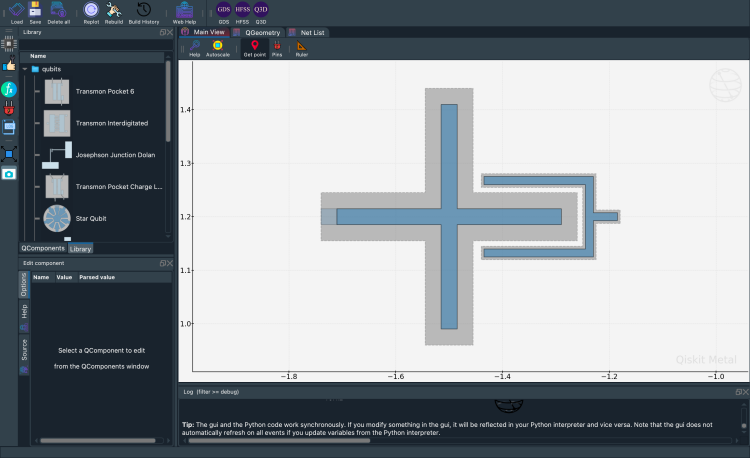

In [25]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross

TransmonCross(design, "transmon", options=best_options)

gui.rebuild()
gui.zoom_on_components(['transmon'])
gui.screenshot("qubit_only.png")

### Querying for a target cavity design

The same workflow can be used to query for a target cavity design.

While it is not necessary, it may be a good idea to `unselect_all()` before creating a new system.

In [19]:
db.unselect_all()

Proceed with selecting the system of interest

In [20]:
db.select_system("cavity_claw")

In [21]:
db.select_cavity_claw("RouteMeander")

In [22]:
db.select_coupler("CLT")

It's always a good idea to check that the system you have selected is correct.

In [23]:
db.show_selections()

Selected component:  cavity_claw
Selected component name:  RouteMeander
Selected data type:  eigenmode
Selected system:  cavity_claw
Selected coupler:  CLT


Great! lets create the system dataframe and analyze it.

In [24]:
df = db.create_system_df()

In [25]:
analyzer = Analyzer(db)

In [26]:
analyzer.target_param_keys()

['resonator_type', 'cavity_frequency_GHz', 'kappa_kHz']

Select the Hamiltonian parameters you want to use for your cavity and search for the closest designs.

In [27]:
target_params = {"cavity_frequency_GHz": 6.9,
                "kappa_kHz": 120,
                "resonator_type":"quarter"}

In [28]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=5,
                                       metric="Euclidean",
                                       display=True)
results

cavity_frequency_GHz   kappa_kHz units                      PI  \
190              6.371017  121.824395    Hz  Eli Levenson-Falk, PhD   
123              6.339319  121.639168    Hz  Eli Levenson-Falk, PhD   
94               6.664178  129.189282    Hz  Eli Levenson-Falk, PhD   
64               6.316474  122.186081    Hz  Eli Levenson-Falk, PhD   
172              6.288789  121.032113    Hz  Eli Levenson-Falk, PhD   

          date_created group institution   uploader coupler_type  \
190  2023-11-30-214122   LFL         USC  Andre Kuo          CLT   
123  2023-11-30-214122   LFL         USC  Andre Kuo          CLT   
94   2023-11-30-214122   LFL         USC  Andre Kuo          CLT   
64   2023-11-30-214122   LFL         USC  Andre Kuo          CLT   
172  2023-11-30-214122   LFL         USC  Andre Kuo          CLT   

                                        design_options   design_tool  \
190  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
123  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
94   {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
64   {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
172  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   

    resonator_type                                              setup  \
190        quarter  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
123        quarter  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
94         quarter  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
64         quarter  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
172        quarter  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   

      simulator  
190  Ansys HFSS  
123  Ansys HFSS  
94   Ansys HFSS  
64   Ansys HFSS  
172  Ansys HFSS

Lets say we want to use the "Weighted Euclidean" metric to find the closest design to our target cavity parameters.

#### Weighted Euclidean Metric

You can do a weighted Euclidean metric instead.

$$
F(\{P_i\},\{p_i\}) = \sum_i w_i\frac{(P_i - p_i)^2}{P_i^2}
$$

Here \( w_i \) are weights which default to 1 if not user-defined.

Note: The default metric for `find_closest` is `Euclidean` when not user-defined.


In [36]:
# Set up the weights
analyzer.metric_weights = {"cavity_frequency_GHz": 2, "kappa_kHz": 1}

In [37]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Weighted Euclidean",
                                       display=True)
results

PI       date_created group institution   uploader  \
94   Eli Levenson-Falk, PhD  2023-11-30-214122   LFL         USC  Andre Kuo   
190  Eli Levenson-Falk, PhD  2023-11-30-214122   LFL         USC  Andre Kuo   
123  Eli Levenson-Falk, PhD  2023-11-30-214122   LFL         USC  Andre Kuo   

                                                 setup   simulator  \
94   {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...  Ansys HFSS   
190  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...  Ansys HFSS   
123  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...  Ansys HFSS   

     cavity_frequency_GHz   kappa_kHz units coupler_type  \
94               6.664178  129.189282    Hz          CLT   
190              6.371017  121.824395    Hz          CLT   
123              6.339319  121.639168    Hz          CLT   

                                        design_options   design_tool  \
94   {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
190  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
123  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   

    resonator_type  
94         quarter  
190        quarter  
123        quarter

### Querying for a target qubit-cavity design

Again, we follow the same procedure as before.

In [29]:
db.select_system(["qubit","cavity_claw"])

In [30]:
db.select_qubit("TransmonCross")
db.select_cavity_claw("RouteMeander")
db.select_coupler("CLT")

In [31]:
db.show_selections()

Selected qubit:  TransmonCross
Selected cavity:  RouteMeander
Selected coupler:  CLT
Selected system:  ['qubit', 'cavity_claw']


In [32]:
merged_df = db.create_system_df()

In [33]:
merged_df

claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
0          94.97421        90.86585        3.73363       158.40783   
1          94.97421        90.86585        3.73363       158.40783   
2          94.97421        90.86585        3.73363       158.40783   
3          94.97421        90.86585        3.73363       158.40783   
4          94.97421        90.86585        3.73363       158.40783   
...             ...             ...            ...             ...   
11599     183.80802       168.04023       15.11184       214.45993   
11600     183.80802       168.04023       15.11184       214.45993   
11601     183.80802       168.04023       15.11184       214.45993   
11602     183.80802       168.04023       15.11184       214.45993   
11603     183.80802       168.04023       15.11184       214.45993   

       cross_to_ground  ground_to_ground units_qubit                PI_qubit  \
0            158.40783         311.25590          fF  Eli Levenson-Falk, PhD   
1            158.40783         311.25590          fF  Eli Levenson-Falk, PhD   
2            158.40783         311.25590          fF  Eli Levenson-Falk, PhD   
3            158.40783         311.25590          fF  Eli Levenson-Falk, PhD   
4            158.40783         311.25590          fF  Eli Levenson-Falk, PhD   
...                ...               ...         ...                     ...   
11599        214.45993         454.60312          fF  Eli Levenson-Falk, PhD   
11600        214.45993         454.60312          fF  Eli Levenson-Falk, PhD   
11601        214.45993         454.60312          fF  Eli Levenson-Falk, PhD   
11602        214.45993         454.60312          fF  Eli Levenson-Falk, PhD   
11603        214.45993         454.60312          fF  Eli Levenson-Falk, PhD   

      date_created_qubit group_qubit  ... group_cavity_claw  \
0      2023-09-20-142547         LFL  ...               LFL   
1      2023-09-20-142547         LFL  ...               LFL   
2      2023-09-20-142547         LFL  ...               LFL   
3      2023-09-20-142547         LFL  ...               LFL   
4      2023-09-20-142547         LFL  ...               LFL   
...                  ...         ...  ...               ...   
11599  2023-09-20-142547         LFL  ...               LFL   
11600  2023-09-20-142547         LFL  ...               LFL   
11601  2023-09-20-142547         LFL  ...               LFL   
11602  2023-09-20-142547         LFL  ...               LFL   
11603  2023-09-20-142547         LFL  ...               LFL   

      institution_cavity_claw uploader_cavity_claw coupler_type  \
0                         USC            Andre Kuo          CLT   
1                         USC            Andre Kuo          CLT   
2                         USC            Andre Kuo          CLT   
3                         USC            Andre Kuo          CLT   
4                         USC            Andre Kuo          CLT   
...                       ...                  ...          ...   
11599                     USC            Andre Kuo          CLT   
11600                     USC            Andre Kuo          CLT   
11601                     USC            Andre Kuo          CLT   
11602                     USC            Andre Kuo          CLT   
11603                     USC            Andre Kuo          CLT   

                              design_options_cavity_claw  \
0      {'claw_opts': {'connection_pads': {'readout': ...   
1      {'claw_opts': {'connection_pads': {'readout': ...   
2      {'claw_opts': {'connection_pads': {'readout': ...   
3      {'claw_opts': {'connection_pads': {'readout': ...   
4      {'claw_opts': {'connection_pads': {'readout': ...   
...                                                  ...   
11599  {'claw_opts': {'connection_pads': {'readout': ...   
11600  {'claw_opts': {'connection_pads': {'readout': ...   
11601  {'claw_opts': {'connection_pads': {'readout': ...   
11602  {'claw_opts': {'connection_pads': {'

Pass the `SQADDS_DB` instance to the `Analyzer` object.

In [34]:
analyzer = Analyzer(db)

Always good to check whether the system you have selected is correct.

In [35]:
db.selected_system

['qubit', 'cavity_claw']

In [36]:
analyzer.selected_system

['qubit', 'cavity_claw']

Define the `target_params` for your qubit-cavity system.

In [37]:
target_params = {
                "qubit_frequency_GHz": 4,
                "cavity_frequency_GHz": 6.2,
                "kappa_kHz": 120,
                "resonator_type":"quarter",
                "anharmonicity_MHz": -200,
                "g_MHz": 70}

In [38]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Euclidean",
                                       display=True)
results

claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
9376     113.99245       107.65111        5.75841       112.70740   
1868     105.76081        99.80185        5.38260       100.41444   
6526     109.80541       103.57639        5.68548       105.83609   

      cross_to_ground  ground_to_ground units_qubit                PI_qubit  \
9376        112.70740         274.49373          fF  Eli Levenson-Falk, PhD   
1868        100.41444         251.82560          fF  Eli Levenson-Falk, PhD   
6526        105.83609         261.84982          fF  Eli Levenson-Falk, PhD   

     date_created_qubit group_qubit  ... resonator_type  \
9376  2023-09-20-142547         LFL  ...        quarter   
1868  2023-10-25-153123         LFL  ...        quarter   
6526  2023-10-25-153123         LFL  ...        quarter   

                                      setup_cavity_claw simulator_cavity_claw  \
9376  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...            Ansys HFSS   
1868  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...            Ansys HFSS   
6526  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...            Ansys HFSS   

                                         design_options        EC         EJ  \
9376  {'cavity_claw_options': {'coupling_type': 'CLT...  0.163509  12.278081   
1868  {'cavity_claw_options': {'coupling_type': 'CLT...  0.183089  12.278081   
6526  {'cavity_claw_options': {'coupling_type': 'CLT...  0.173690  12.278081   

           EJEC  qubit_frequency_GHz  anharmonicity_MHz      g_MHz  
9376  75.091150             3.836546        -182.146843  68.095121  
1868  67.060879             4.048670        -205.518797  70.226899  
6526  70.689450             3.948506        -194.262295  70.978895  

[3 rows x 38 columns]

Awesome! we have some designs for our qubit-cavity system. To see where the closest design lies in the Hamiltonian parameter space, we can use the `closest_design_in_H_space` method.

In [39]:
%matplotlib inline

In [40]:
analyzer.closest_design_in_H_space()

#### Interpolation of Best Designs

Even though the `closest_design` will become better as more validated pre-simulated points are added to the database, it is still a good idea to interpolate to get the best designs.

We use the physics inspired interpolation algorithm described in our [paper](https://arxiv.org/pdf/2312.13483.pdf) - `ScalingInterpolator` class to interpolate the best designs.

In [41]:
from squadds.interpolations.physics import ScalingInterpolator

We pass the `Analzyer` object and the `target_params` dict to the `ScalingInterpolator` class.

In [42]:
# Create an instance of ScalingInterpolator
interpolator = ScalingInterpolator(analyzer, target_params)

design_df = interpolator.get_design()

Kappa scaling: 0.9957270715288064
g scaling: 1.0033220328956947
alpha scaling: 1.0111571303804734


The `design_df` contains the various `design_options` for the best designs and also the `sim_options` needed to simulate them.

In [43]:
design_df

design_options_qubit  \
0  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...   

                          design_options_cavity_claw  \
0  {'claw_opts': {'connection_pads': {'readout': ...   

                                   sim_options_qubit  \
0  {'auto_increase_solution_order': True, 'enable...   

                             sim_options_cavity_claw  \
0  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   

                                      design_options  
0  {'cavity_claw_options': {'coupling_type': 'CLT...

Congrats for making it to the end of this tutorial! ü§óüéâ You have now learned how to use the SQuADDS API to query for closest and "best-guess" interpolated device designs for your chosen Hamiltonian parameters.

## Next Steps...

In the next [tutorial](https://lfl-lab.github.io/SQuADDS/source/tutorials/Tutorial-2_Simulate_interpolated_designs.html), we will learn how to simulate the "best-guess" design using an EM solver tool and the `SQuADDS` API.

## License

<div style='width: 100%; background-color:#3cb1c2;color:#324344;padding-left: 10px; padding-bottom: 10px; padding-right: 10px; padding-top: 5px'>
    <h3>This code is a part of SQuADDS</h3>
    <p>Developed by Sadman Ahmed Shanto</p>
    <p>&copy; Copyright Sadman Ahmed Shanto & Eli Levenson-Falk 2023.</p>
    <p>This code is licensed under the MIT License. You may<br> obtain a copy of this license in the LICENSE.txt file in the root directory<br> of this source tree.</p>
    <p>Any modifications or derivative works of this code must retain this<br>copyright notice, and modified files need to carry a notice indicating<br>that they have been altered from the originals.</p>
</div>